# House Price Data Preprocessing and Visualization

This notebook provides comprehensive data preprocessing and visualization for the house price prediction dataset. We will clean the data, handle missing values, perform feature engineering, and create meaningful visualizations to understand the underlying patterns in the real estate data.

## 1. Import Required Libraries

Let's start by importing all the necessary libraries for data manipulation, analysis, and visualization.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import zscore

# Settings for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

Load the training and test datasets and perform initial exploration to understand the data structure.

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Dataset loaded successfully!")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"\nTraining set columns: {len(train_df.columns)}")
print(f"Test set columns: {len(test_df.columns)}")

# Display basic information about the dataset
print("\n" + "="*50)
print("TRAINING DATASET INFO")
print("="*50)
print(train_df.info())

print("\n" + "="*50)
print("FIRST 5 ROWS OF TRAINING DATA")
print("="*50)
train_df.head()

Dataset loaded successfully!
Training set shape: (1460, 81)
Test set shape: (1459, 80)

Training set columns: 81
Test set columns: 80

TRAINING DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-nul

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Basic statistical summary
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("="*50)
train_df.describe()

STATISTICAL SUMMARY OF NUMERICAL FEATURES


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3. Data Cleaning and Preprocessing

Let's start by examining the data types and identifying any inconsistencies.

In [12]:
# Check for duplicates
print("DUPLICATE ANALYSIS")
print("="*30)
print(f"Training set duplicates: {train_df.duplicated().sum()}")
print(f"Test set duplicates: {test_df.duplicated().sum()}")

# Identify data types
print(f"\nDATA TYPES DISTRIBUTION")
print("="*30)
print(f"Numerical columns: {len(train_df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical columns: {len(train_df.select_dtypes(include=['object']).columns)}")

# Separate numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols[:10]}...") # Show first 10
print(f"Categorical columns: {categorical_cols}")

# Check unique values in categorical columns
print(f"\nUNIQUE VALUES IN CATEGORICAL COLUMNS")
print("="*40)
for col in categorical_cols:
    unique_count = train_df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {train_df[col].unique()}")
    print()

DUPLICATE ANALYSIS
Training set duplicates: 0
Test set duplicates: 0

DATA TYPES DISTRIBUTION
Numerical columns: 38
Categorical columns: 43

Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']...
Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

UNIQUE VALUES IN CATEGORICAL COLUMNS
MSZoning: 5 unique values
  Values: ['RL' 'RM' 'C (all)' 'FV' 'R

## 4. Handle Missing Values

Let's analyze missing values in the dataset and implement appropriate strategies to handle them.

In [13]:
# Analyze missing values
def analyze_missing_values(df, dataset_name):
    print(f"\nMISSING VALUES ANALYSIS - {dataset_name}")
    print("="*50)
    
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    
    print(f"Total missing values: {df.isnull().sum().sum()}")
    print(f"Columns with missing values: {len(missing_df)}")
    print(f"\nTop missing values:")
    print(missing_df.head(10))
    
    return missing_df

# Analyze missing values in both datasets
train_missing = analyze_missing_values(train_df, "TRAINING SET")
test_missing = analyze_missing_values(test_df, "TEST SET")


MISSING VALUES ANALYSIS - TRAINING SET
Total missing values: 7829
Columns with missing values: 19

Top missing values:
              Missing Count  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945

MISSING VALUES ANALYSIS - TEST SET
Total missing values: 7878
Columns with missing values: 33

Top missing values:
             Missing Count  Missing Percentage
PoolQC                1456           99.794380
MiscFeature           1408           96.504455
Alley                 1352           92.666210
Fence                 1169           80.123372
M

In [3]:
# Handle missing values with different strategies
def handle_missing_values(df):
    """
    Handle missing values in the dataset with appropriate strategies
    """
    df_clean = df.copy()
    
    # For features that are legitimately missing (no basement, no garage, etc.)
    # These NaN values actually mean "None" or "Not Applicable"
    
    # Basement related features
    basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in basement_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
    
    # Garage related features
    garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
    
    # Other categorical features where NaN means "None"
    none_categorical = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'MasVnrType']
    for col in none_categorical:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
    
    # For numerical features, use median imputation
    numerical_features = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_features:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # For remaining categorical features, use mode imputation
    categorical_features = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_features:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    return df_clean

# Clean both datasets
print("Cleaning datasets...")
train_clean = handle_missing_values(train_df)
test_clean = handle_missing_values(test_df)

print(f"Training set missing values after cleaning: {train_clean.isnull().sum().head}")
print(f"Test set missing values after cleaning: {test_clean.isnull().sum().head}")
print("Data cleaning completed!")

Cleaning datasets...
Training set missing values after cleaning: <bound method NDFrame.head of Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64>
Test set missing values after cleaning: <bound method NDFrame.head of Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64>
Data cleaning completed!


## 5. Feature Engineering

Create new features and encode categorical variables to prepare the data for analysis.

In [4]:
# Feature Engineering
def create_new_features(df):
    """
    Create new meaningful features from existing ones
    """
    df_engineered = df.copy()
    
    # House age at time of sale
    df_engineered['HouseAge'] = df_engineered['YrSold'] - df_engineered['YearBuilt']
    
    # Years since remodeling
    df_engineered['YearsSinceRemodel'] = df_engineered['YrSold'] - df_engineered['YearRemodAdd']
    
    # Total square footage
    df_engineered['TotalSF'] = df_engineered['TotalBsmtSF'] + df_engineered['1stFlrSF'] + df_engineered['2ndFlrSF']
    
    # Total bathrooms
    df_engineered['TotalBath'] = df_engineered['FullBath'] + df_engineered['HalfBath'] + df_engineered['BsmtFullBath'] + df_engineered['BsmtHalfBath']
    
    # Porch area
    df_engineered['TotalPorchSF'] = (df_engineered['OpenPorchSF'] + df_engineered['3SsnPorch'] + 
                                    df_engineered['EnclosedPorch'] + df_engineered['ScreenPorch'] + 
                                    df_engineered['WoodDeckSF'])
    
    # Has 2nd floor
    df_engineered['Has2ndFloor'] = (df_engineered['2ndFlrSF'] > 0).astype(int)
    
    # Has garage
    df_engineered['HasGarage'] = (df_engineered['GarageArea'] > 0).astype(int)
    
    # Has basement
    df_engineered['HasBasement'] = (df_engineered['TotalBsmtSF'] > 0).astype(int)
    
    # Price per square foot (only for training data)
    if 'SalePrice' in df_engineered.columns:
        df_engineered['PricePerSF'] = df_engineered['SalePrice'] / df_engineered['TotalSF']
    
    return df_engineered

# Apply feature engineering
print("Creating new features...")
train_engineered = create_new_features(train_clean)
test_engineered = create_new_features(test_clean)

# Display new features
new_features = ['HouseAge', 'YearsSinceRemodel', 'TotalSF', 'TotalBath', 'TotalPorchSF', 
                'Has2ndFloor', 'HasGarage', 'HasBasement']

print(f"\nNew features created: {new_features}")
print(f"Training set shape after feature engineering: {train_engineered.shape}")
print(f"Test set shape after feature engineering: {test_engineered.shape}")

# Show sample of new features
print(f"\nSample of new features:")
train_engineered[new_features].head()

Creating new features...

New features created: ['HouseAge', 'YearsSinceRemodel', 'TotalSF', 'TotalBath', 'TotalPorchSF', 'Has2ndFloor', 'HasGarage', 'HasBasement']
Training set shape after feature engineering: (1460, 90)
Test set shape after feature engineering: (1459, 88)

Sample of new features:


,HouseAge,YearsSinceRemodel,TotalSF,TotalBath,TotalPorchSF,Has2ndFloor,HasGarage,HasBasement
0,5,5,2566,4,61,1,1,1
1,31,31,2524,3,298,0,1,1
2,7,6,2706,4,42,1,1,1
3,91,36,2473,2,307,1,1,1
4,8,8,3343,4,276,1,1,1


## 6. Data Visualization

Create comprehensive visualizations to understand the data patterns and relationships.

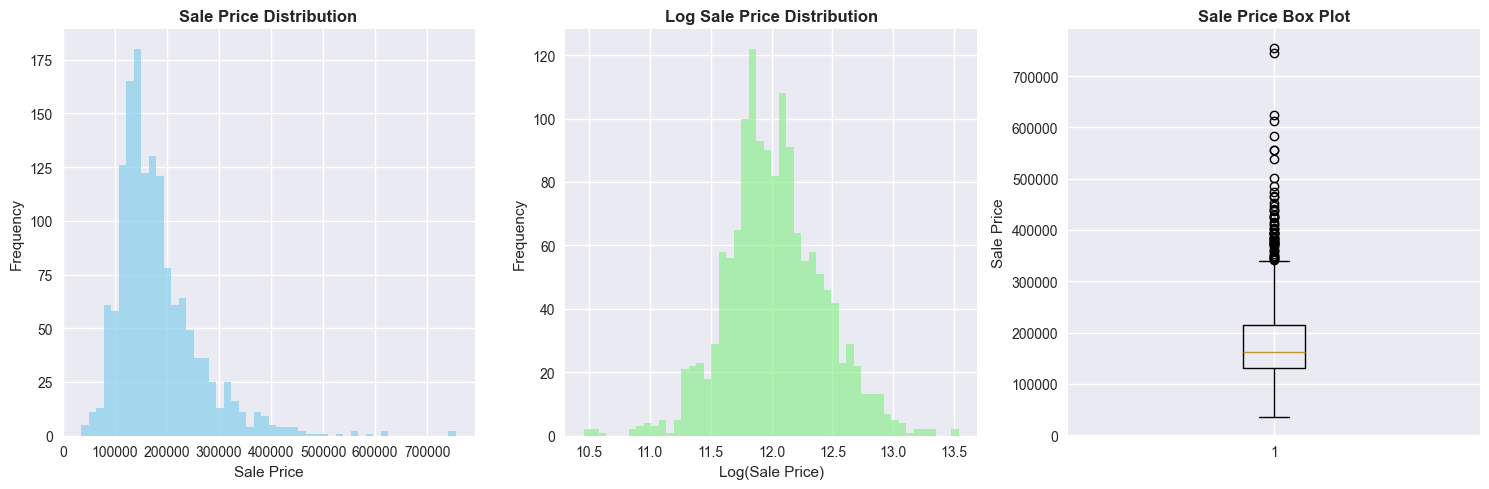

SALE PRICE STATISTICS
Mean: $180,921.20
Median: $163,000.00
Standard Deviation: $79,442.50
Minimum: $34,900.00
Maximum: $755,000.00
Skewness: 1.883
Kurtosis: 6.536


In [16]:
# 6.1 Target Variable Distribution (Sale Price)
plt.figure(figsize=(15, 5))

# Sale Price Distribution
plt.subplot(1, 3, 1)
plt.hist(train_engineered['SalePrice'], bins=50, alpha=0.7, color='skyblue')
plt.title('Sale Price Distribution', fontweight='bold')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Log-transformed Sale Price
plt.subplot(1, 3, 2)
plt.hist(np.log(train_engineered['SalePrice']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Log Sale Price Distribution', fontweight='bold')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 3)
plt.boxplot(train_engineered['SalePrice'])
plt.title('Sale Price Box Plot', fontweight='bold')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

# Statistics
print("SALE PRICE STATISTICS")
print("="*30)
print(f"Mean: ${train_engineered['SalePrice'].mean():,.2f}")
print(f"Median: ${train_engineered['SalePrice'].median():,.2f}")
print(f"Standard Deviation: ${train_engineered['SalePrice'].std():,.2f}")
print(f"Minimum: ${train_engineered['SalePrice'].min():,.2f}")
print(f"Maximum: ${train_engineered['SalePrice'].max():,.2f}")
print(f"Skewness: {train_engineered['SalePrice'].skew():.3f}")
print(f"Kurtosis: {train_engineered['SalePrice'].kurtosis():.3f}")

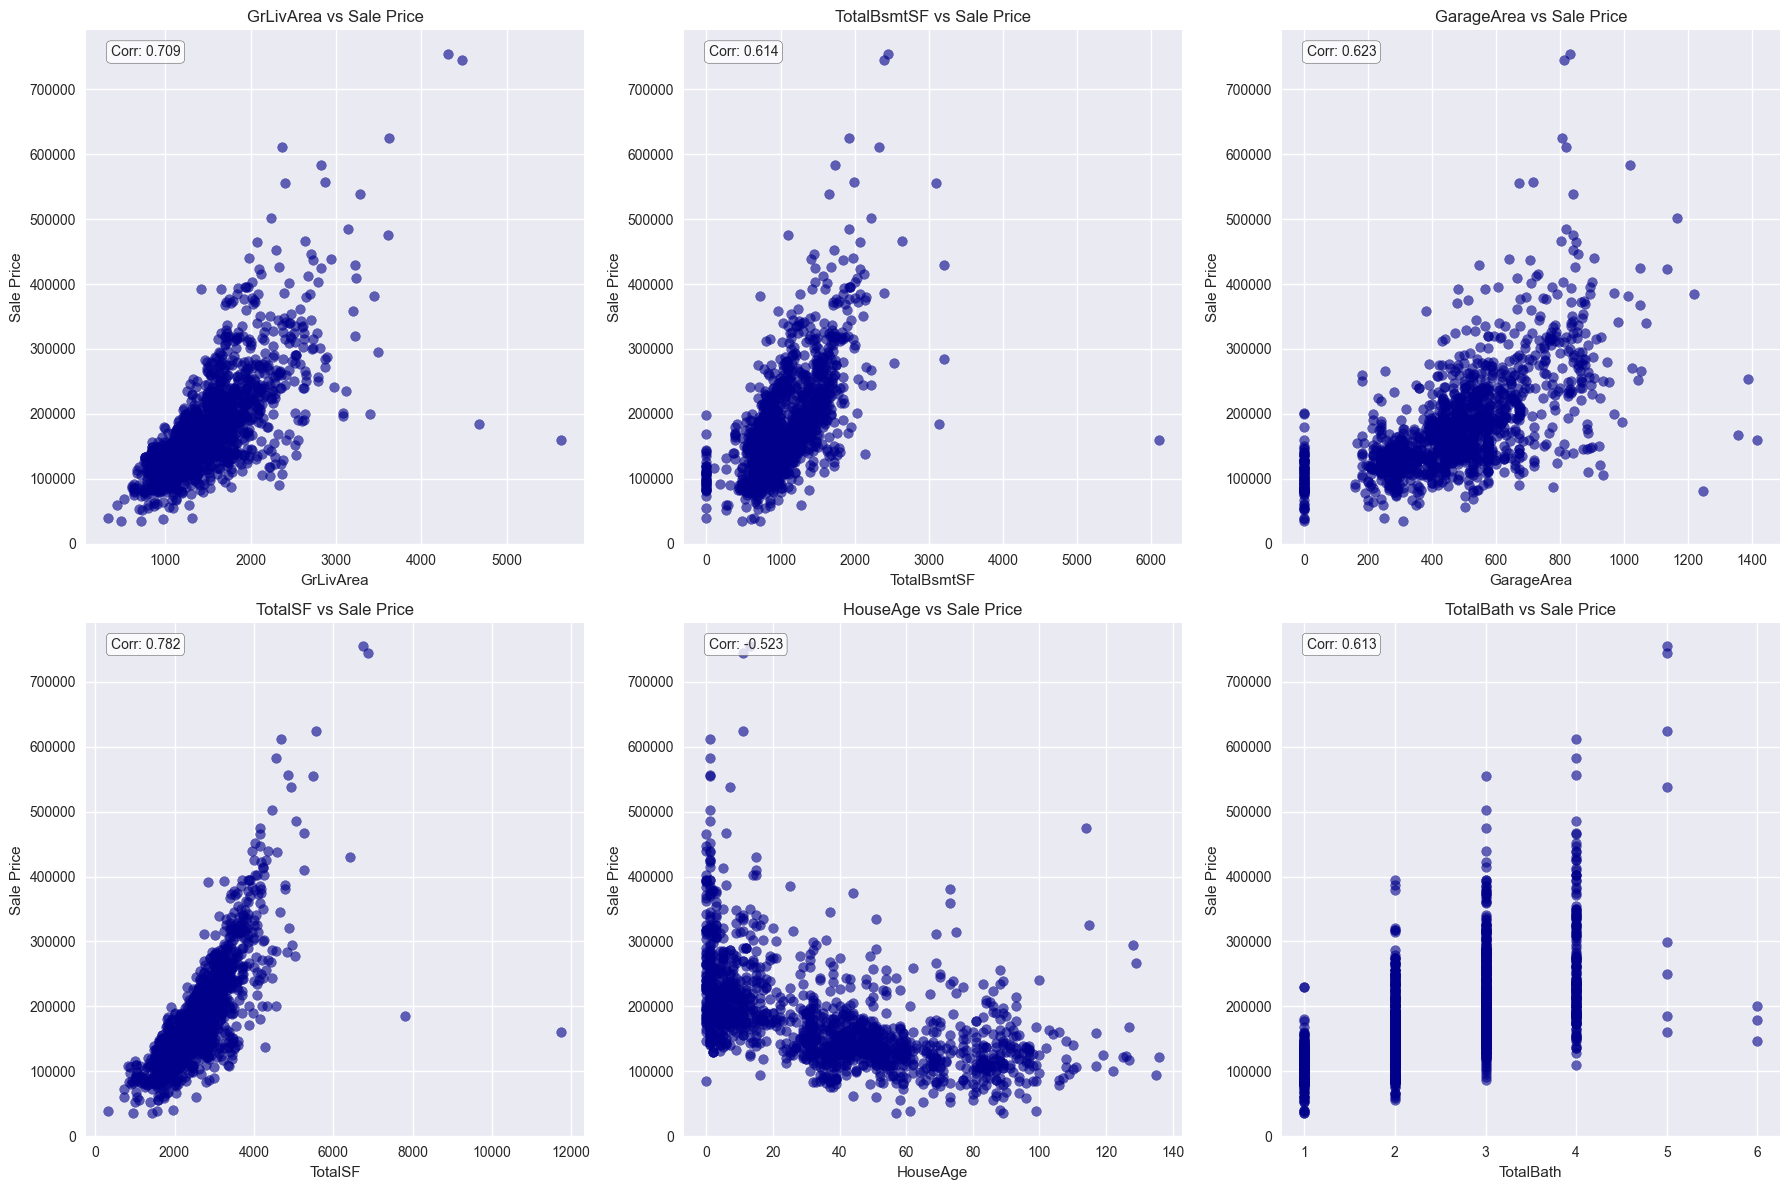

In [17]:
# 6.2 Key Numerical Features Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Important numerical features to analyze
key_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'TotalSF', 'HouseAge', 'TotalBath']

for i, feature in enumerate(key_features):
    row = i // 3
    col = i % 3
    
    # Scatter plot with Sale Price
    axes[row, col].scatter(train_engineered[feature], train_engineered['SalePrice'], 
                          alpha=0.6, color='darkblue')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Sale Price')
    axes[row, col].set_title(f'{feature} vs Sale Price')
    
    # Add correlation coefficient
    correlation = train_engineered[feature].corr(train_engineered['SalePrice'])
    axes[row, col].text(0.05, 0.95, f'Corr: {correlation:.3f}', 
                       transform=axes[row, col].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

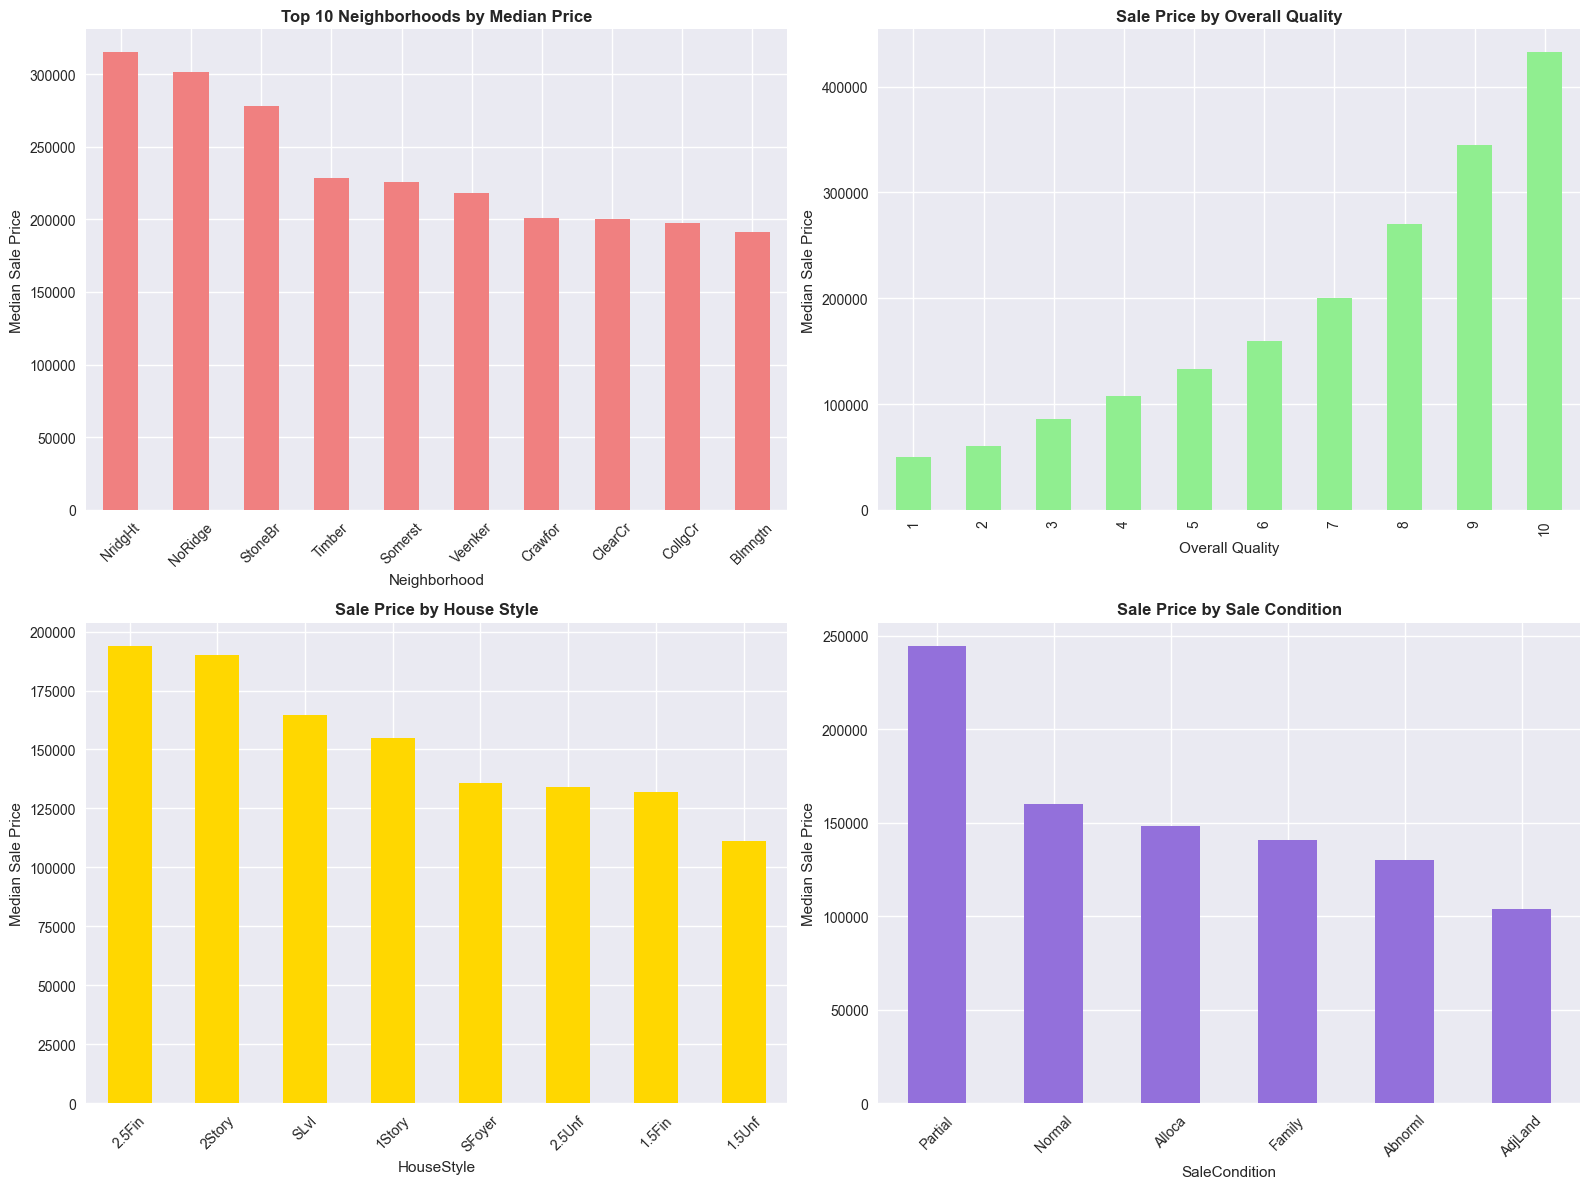

In [18]:
# 6.3 Categorical Features Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Neighborhood analysis
neighborhood_prices = train_engineered.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
top_neighborhoods = neighborhood_prices.head(10)

top_neighborhoods.plot(kind='bar', ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('Top 10 Neighborhoods by Median Price', fontweight='bold')
axes[0, 0].set_ylabel('Median Sale Price')
axes[0, 0].tick_params(axis='x', rotation=45)

# Overall Quality analysis
quality_prices = train_engineered.groupby('OverallQual')['SalePrice'].median()
quality_prices.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Sale Price by Overall Quality', fontweight='bold')
axes[0, 1].set_ylabel('Median Sale Price')
axes[0, 1].set_xlabel('Overall Quality')

# House Style analysis
style_prices = train_engineered.groupby('HouseStyle')['SalePrice'].median().sort_values(ascending=False)
style_prices.plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Sale Price by House Style', fontweight='bold')
axes[1, 0].set_ylabel('Median Sale Price')
axes[1, 0].tick_params(axis='x', rotation=45)

# Sale Condition analysis
condition_prices = train_engineered.groupby('SaleCondition')['SalePrice'].median().sort_values(ascending=False)
condition_prices.plot(kind='bar', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Sale Price by Sale Condition', fontweight='bold')
axes[1, 1].set_ylabel('Median Sale Price')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

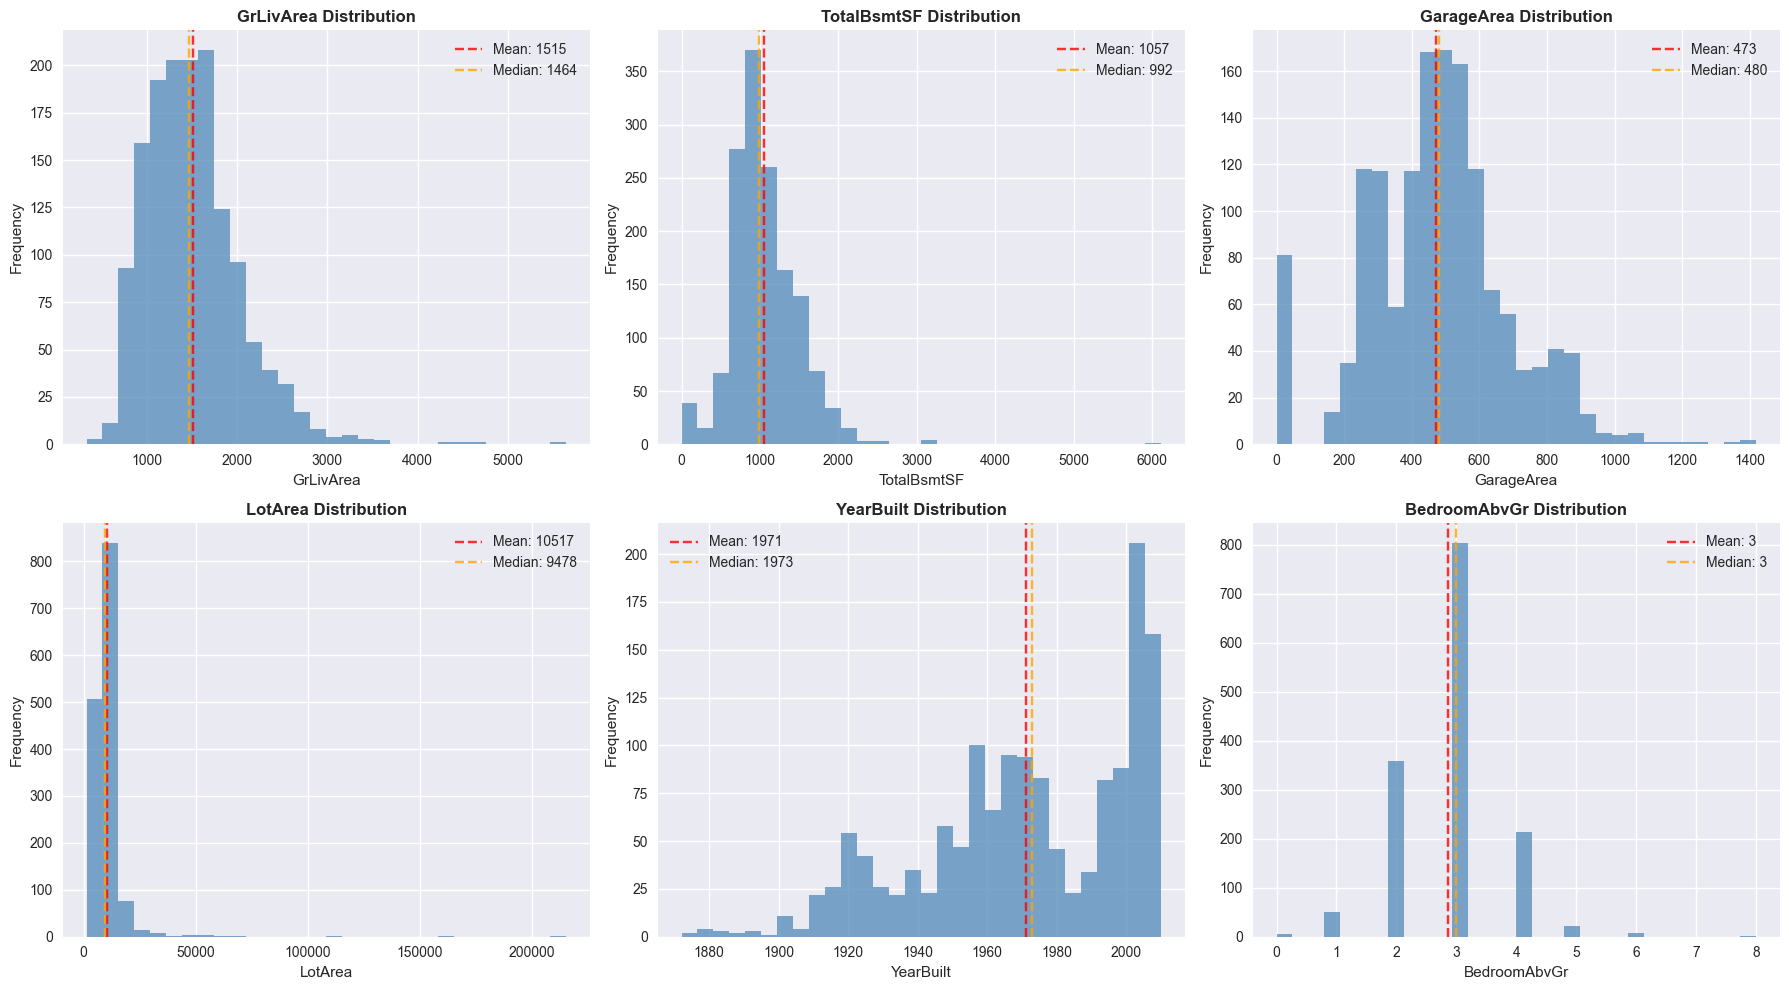

In [19]:
# 6.4 Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Important features distributions
features_to_plot = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'YearBuilt', 'BedroomAbvGr']

for i, feature in enumerate(features_to_plot):
    row = i // 3
    col = i % 3
    
    # Histogram
    axes[row, col].hist(train_engineered[feature], bins=30, alpha=0.7, color='steelblue')
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = train_engineered[feature].mean()
    median_val = train_engineered[feature].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.0f}')
    axes[row, col].axvline(median_val, color='orange', linestyle='--', alpha=0.8, label=f'Median: {median_val:.0f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

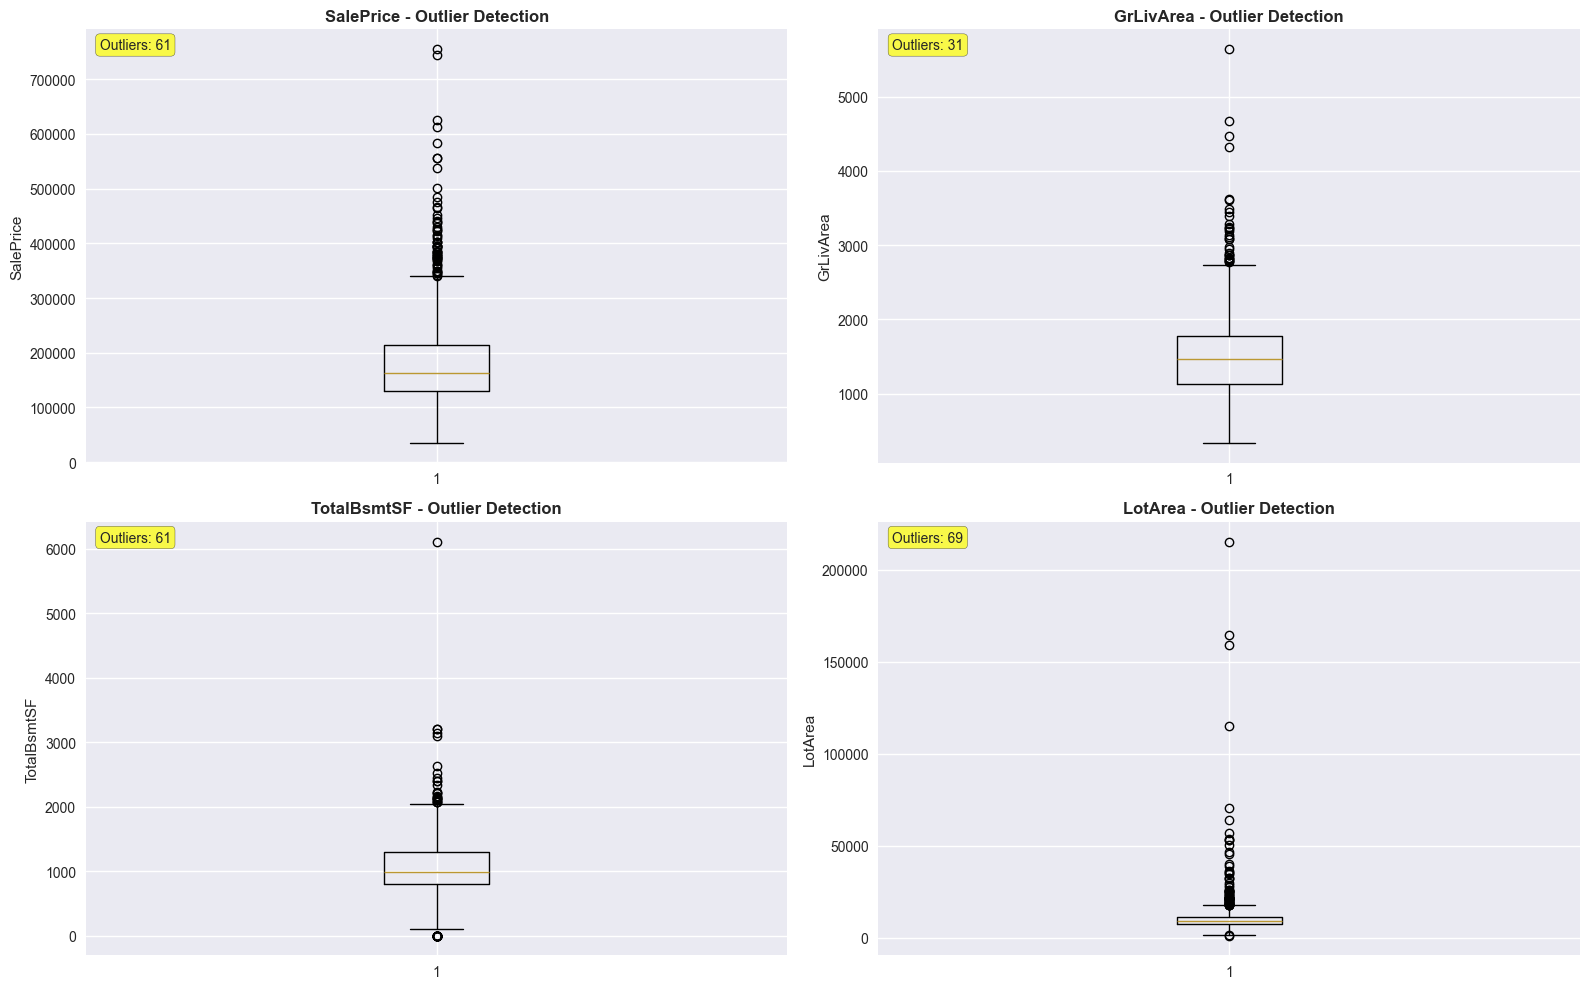

OUTLIER ANALYSIS
SalePrice: 61 outliers (4.2%)
GrLivArea: 31 outliers (2.1%)
TotalBsmtSF: 61 outliers (4.2%)
LotArea: 69 outliers (4.7%)


In [20]:
# 6.5 Outlier Detection and Visualization
def detect_outliers_iqr(df, feature):
    """Detect outliers using IQR method"""
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers in key features
outlier_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, feature in enumerate(outlier_features):
    row = i // 2
    col = i % 2
    
    # Box plot
    axes[row, col].boxplot(train_engineered[feature])
    axes[row, col].set_title(f'{feature} - Outlier Detection', fontweight='bold')
    axes[row, col].set_ylabel(feature)
    
    # Calculate outliers
    outliers, lower, upper = detect_outliers_iqr(train_engineered, feature)
    axes[row, col].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                       transform=axes[row, col].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                       verticalalignment='top')

plt.tight_layout()
plt.show()

# Print outlier statistics
print("OUTLIER ANALYSIS")
print("="*30)
for feature in outlier_features:
    outliers, _, _ = detect_outliers_iqr(train_engineered, feature)
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(train_engineered)*100:.1f}%)")

## 7. Correlation Analysis

Analyze correlations between features and create heatmaps to understand relationships.

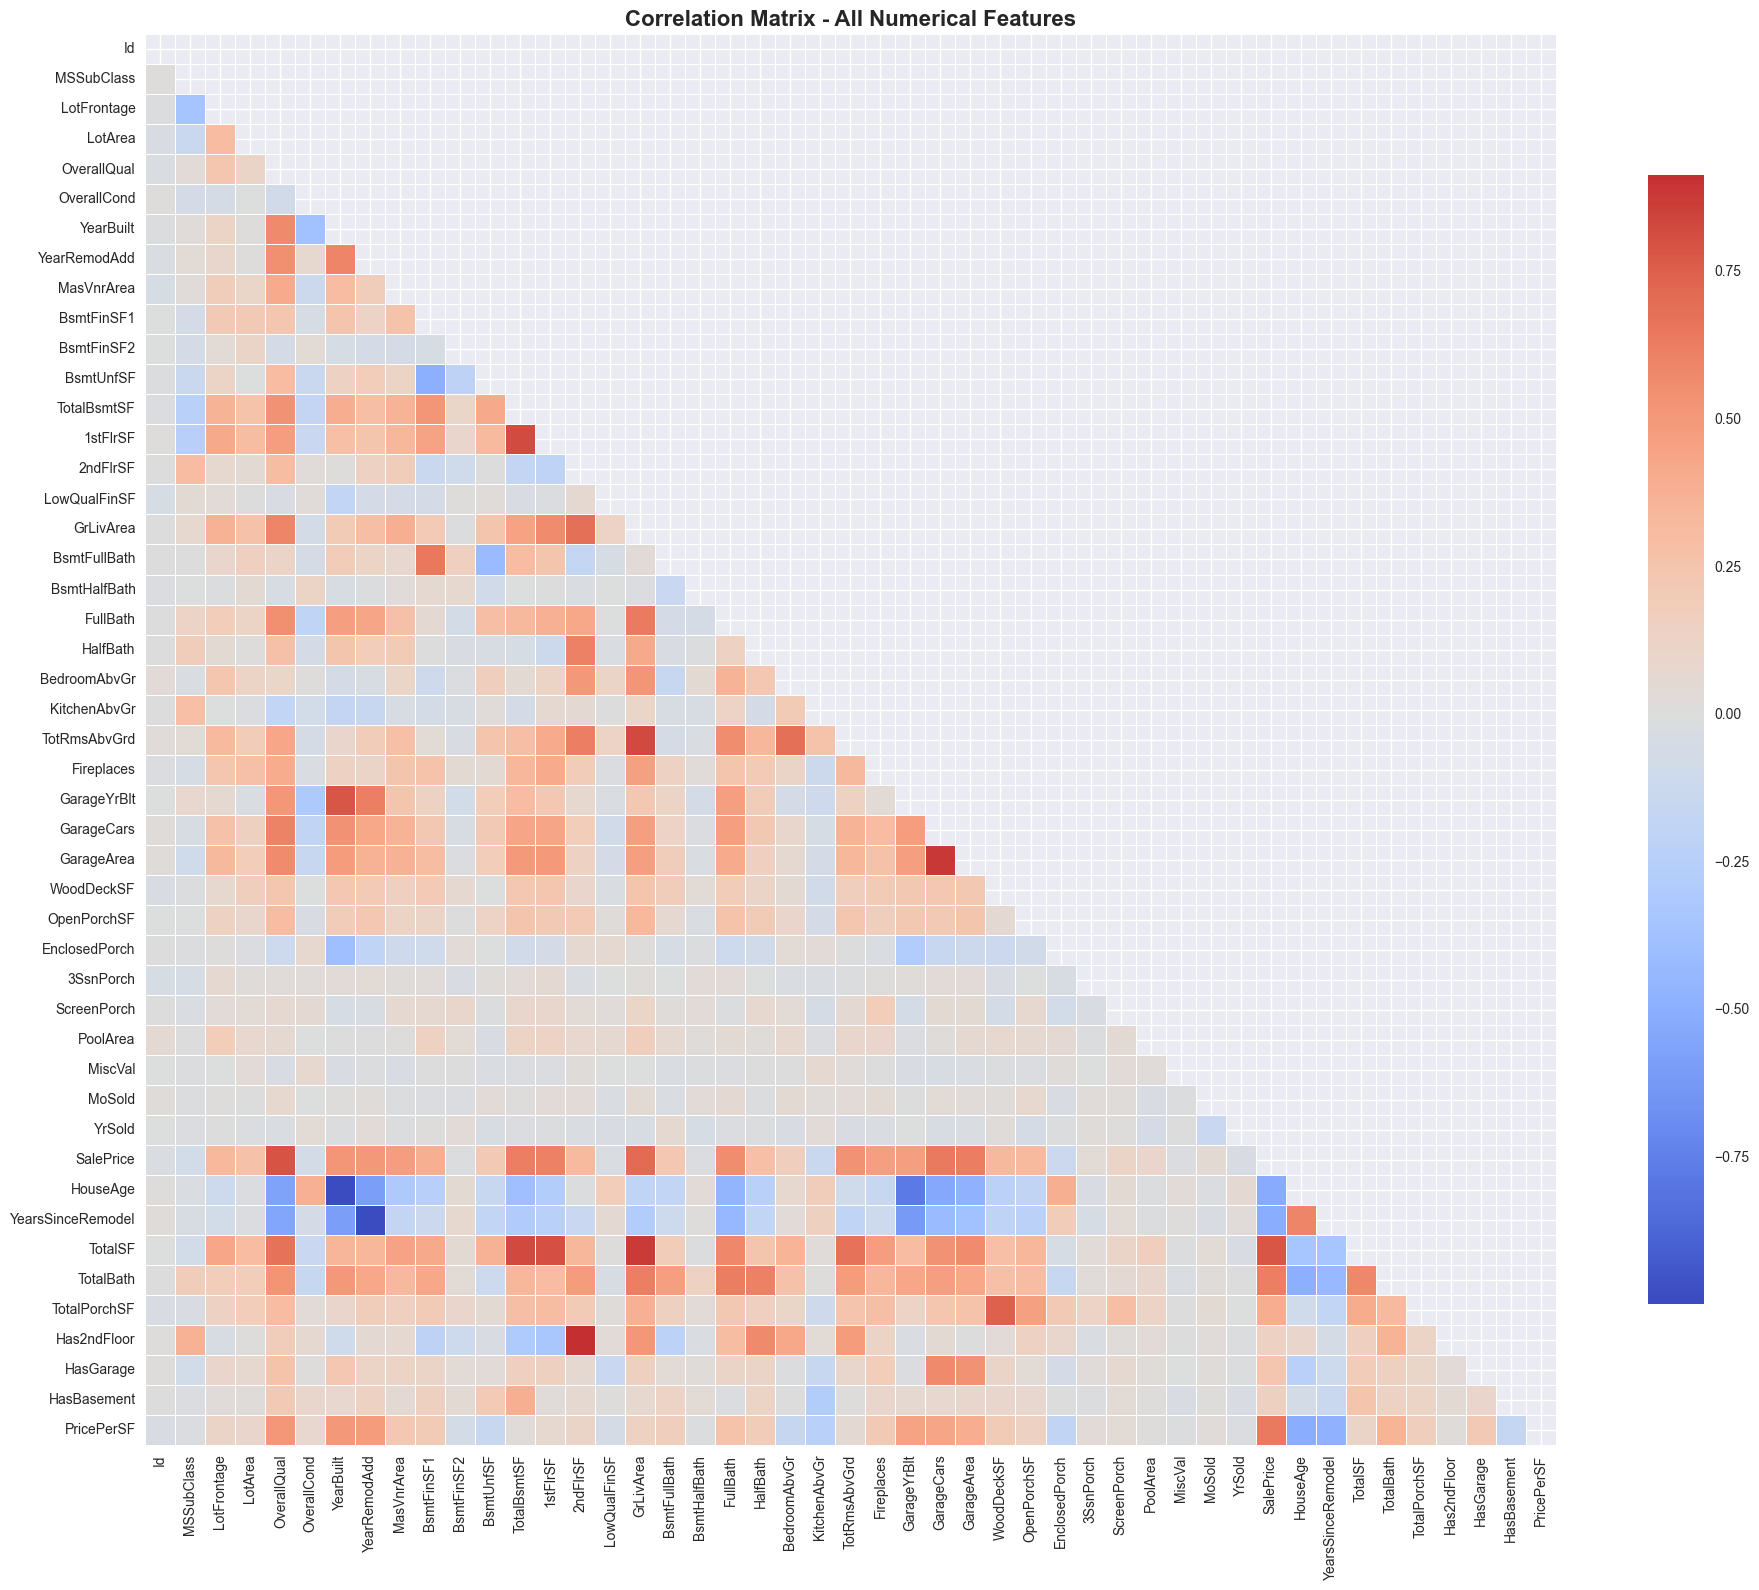

TOP 15 FEATURES CORRELATED WITH SALE PRICE
 2. OverallQual          :  0.791
 3. TotalSF              :  0.782
 4. GrLivArea            :  0.709
 5. PricePerSF           :  0.641
 6. GarageCars           :  0.640
 7. GarageArea           :  0.623
 8. TotalBsmtSF          :  0.614
 9. TotalBath            :  0.613
10. 1stFlrSF             :  0.606
11. FullBath             :  0.561
12. TotRmsAbvGrd         :  0.534
13. YearBuilt            :  0.523
14. YearRemodAdd         :  0.507
15. MasVnrArea           :  0.473
16. Fireplaces           :  0.467


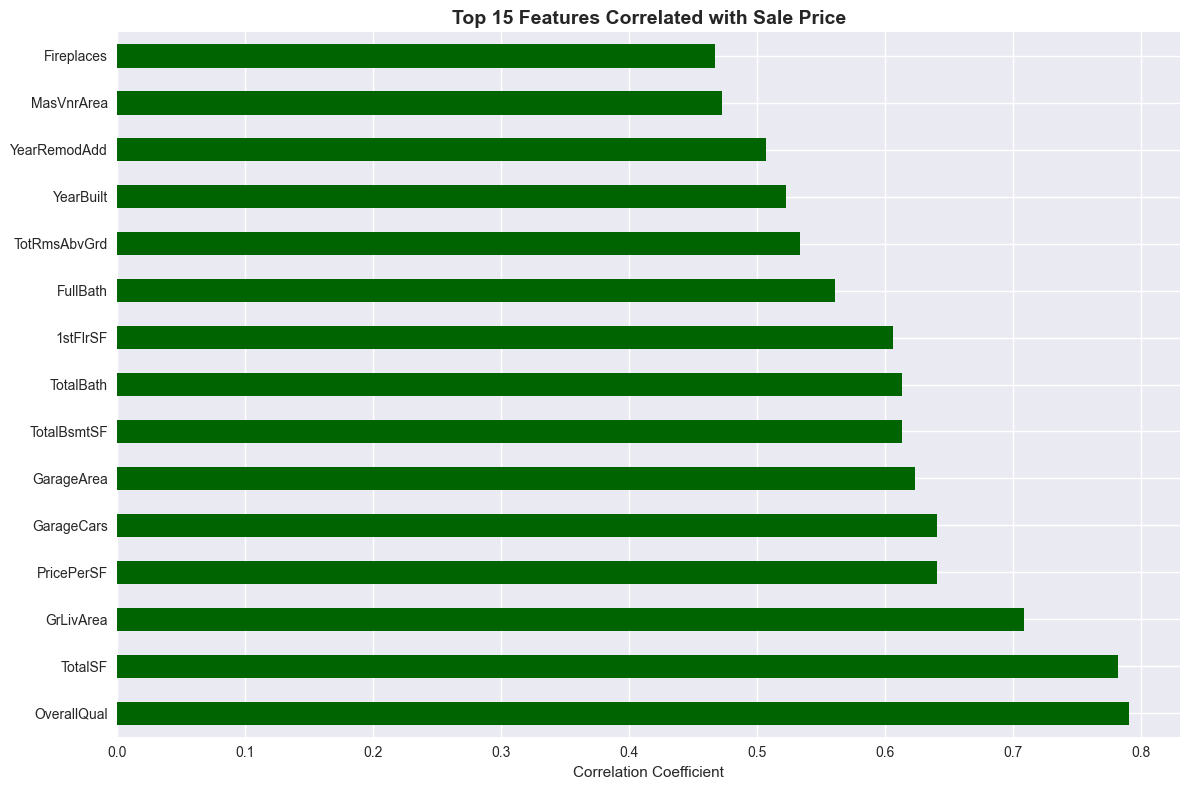

In [21]:
# 7.1 Correlation Matrix for Numerical Features
numerical_features = train_engineered.select_dtypes(include=[np.number]).columns
corr_matrix = train_engineered[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Sale Price
if 'SalePrice' in corr_matrix.columns:
    sale_price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
    
    print("TOP 15 FEATURES CORRELATED WITH SALE PRICE")
    print("="*50)
    for i, (feature, corr) in enumerate(sale_price_corr.head(16).items(), 1):
        if feature != 'SalePrice':
            print(f"{i:2d}. {feature:<20} : {corr:6.3f}")
    
    # Visualize top correlations
    plt.figure(figsize=(12, 8))
    top_corr = sale_price_corr.head(16).drop('SalePrice')  # Remove SalePrice itself
    colors = ['darkgreen' if x > 0 else 'darkred' for x in top_corr.values]
    
    top_corr.plot(kind='barh', color=colors)
    plt.title('Top 15 Features Correlated with Sale Price', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

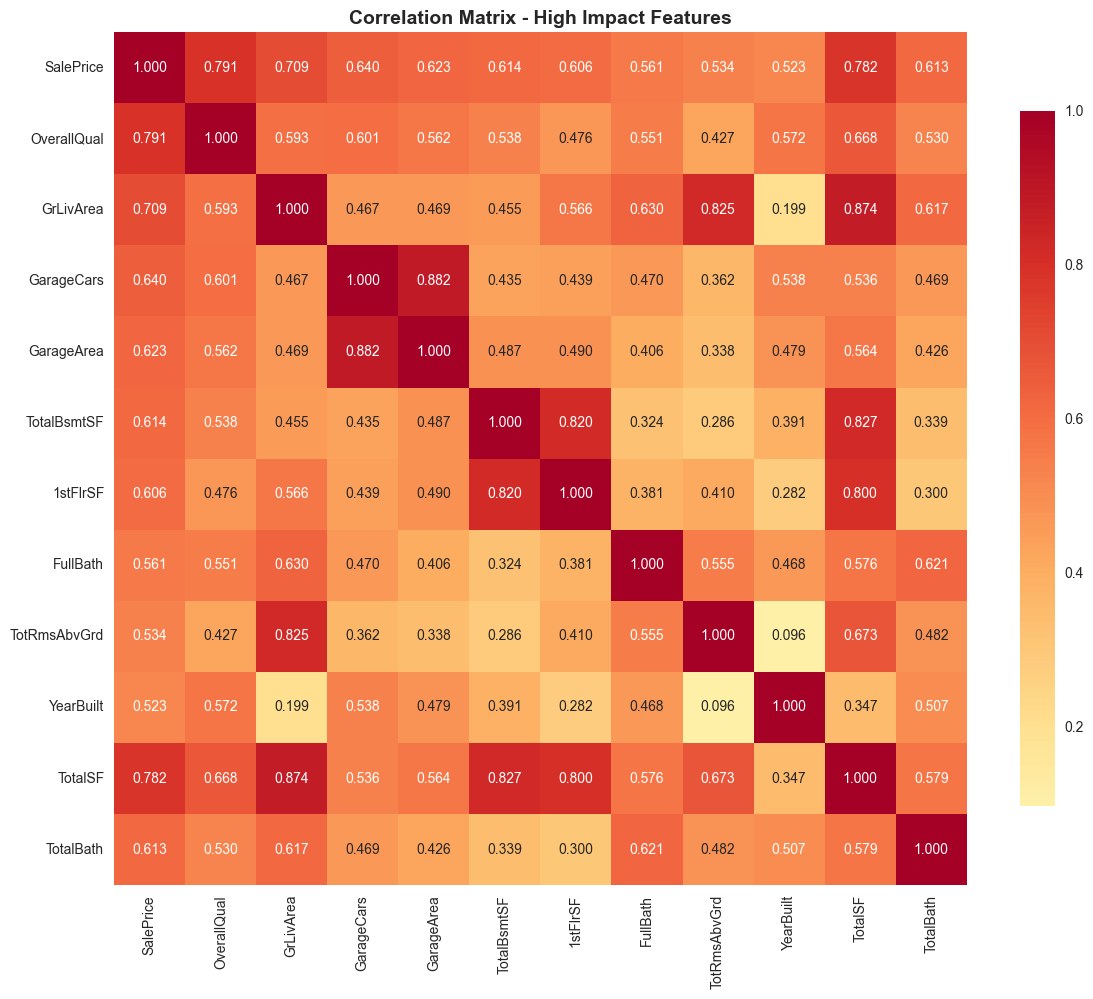


HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.7)
GrLivArea <-> TotRmsAbvGrd: 0.825
GrLivArea <-> TotalSF: 0.874
GarageCars <-> GarageArea: 0.882
TotalBsmtSF <-> 1stFlrSF: 0.820
TotalBsmtSF <-> TotalSF: 0.827
1stFlrSF <-> TotalSF: 0.800


In [22]:
# 7.2 Focused Correlation Analysis - High Correlation Features
high_corr_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                     'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
                     'TotalSF', 'TotalBath']

# Filter features that exist in our dataset
existing_features = [f for f in high_corr_features if f in train_engineered.columns]
focused_corr = train_engineered[existing_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(focused_corr, annot=True, cmap='RdYlBu_r', center=0, 
           square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - High Impact Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs (potential multicollinearity)
high_corr_pairs = []
for i in range(len(focused_corr.columns)):
    for j in range(i+1, len(focused_corr.columns)):
        corr_val = focused_corr.iloc[i, j]
        if abs(corr_val) > 0.7 and focused_corr.columns[i] != 'SalePrice' and focused_corr.columns[j] != 'SalePrice':
            high_corr_pairs.append((focused_corr.columns[i], focused_corr.columns[j], corr_val))

print("\nHIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.7)")
print("="*60)
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

## 8. XGBoost Modeling: Split, Train, Save, Evaluate, Predict

We'll split the engineered training data, train an XGBoost regressor for the `SalePrice` target, save the trained pipeline as a `.pkl`, evaluate on a holdout set, and generate predictions for `test.csv`.

In [ ]:
# 8.1 Prepare features and train/validation split
from sklearn.model_selection import train_test_split

# Ensure the target exists in the engineered training data
assert 'SalePrice' in train_engineered.columns, "Target column 'SalePrice' not found in training data."

target_col = 'SalePrice'
id_col = 'Id' if 'Id' in train_engineered.columns else None

# Separate features and target
y = train_engineered[target_col].copy()
feature_cols = [c for c in train_engineered.columns if c != target_col]
X = train_engineered[feature_cols].copy()

# Drop target-derived or train-only columns that do not exist in test dataset (e.g., PricePerSF)
train_only_cols = [c for c in X.columns if c not in test_engineered.columns]
if train_only_cols:
    print(f"Dropping train-only columns not in test: {train_only_cols}")
    X = X.drop(columns=train_only_cols)
    feature_cols = list(X.columns)

# Keep an Id reference for later comparison if available
id_series = train_engineered[id_col] if id_col else pd.Series(train_engineered.index, index=train_engineered.index, name='Id')

# Identify categorical and numeric columns from the filtered X
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# It's common to drop identifier columns from features
if id_col and id_col in numeric_cols:
    numeric_cols.remove(id_col)
if id_col and id_col in X.columns:
    X = X.drop(columns=[id_col])

# Final train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Save the validation Ids for comparison
valid_ids = id_series.loc[X_valid.index]

print(f"X_train: {X_train.shape}, X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")
print(f"Categorical cols: {len(categorical_cols)} | Numeric cols: {len(numeric_cols)}")

X_train: (1168, 88), X_valid: (292, 88)
y_train: (1168,), y_valid: (292,)
Categorical cols: 43 | Numeric cols: 45


In [6]:
# 8.2 Build the pipeline and train the XGBoost model
import os
from joblib import dump
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

# Check xgboost availability
try:
    from xgboost import XGBRegressor
    print("xgboost imported successfully")
except ImportError as e:
    raise ImportError("xgboost is not installed. Please install it with `pip install xgboost`.\n" + str(e))

# Preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
 )

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

# Train
pipeline.fit(X_train, y_train)
print("Model training complete.")

# Save the trained pipeline
os.makedirs("models", exist_ok=True)
model_path = os.path.join("models", "xgb_saleprice.pkl")
dump(pipeline, model_path)
print(f"Model saved to: {model_path}")

xgboost imported successfully
Model training complete.
Model saved to: models\xgb_saleprice.pkl


In [8]:
# 8.3 Evaluate on validation split and compare predictions vs actual
import numpy as np
import pandas as pd

# Predict
y_pred = pipeline.predict(X_valid)

# Metrics
mae = metrics.mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_valid, y_pred))
r2 = metrics.r2_score(y_valid, y_pred)

print("Validation Metrics")
print("===================")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R^2 : {r2:,.4f}")

# Build comparison DataFrame (column-wise)
comparison_df = pd.DataFrame({
    "Id": valid_ids.values,
    "Actual_SalePrice": y_valid.values,
    "Predicted_SalePrice": y_pred,
})
comparison_df["Absolute_Error"] = (comparison_df["Actual_SalePrice"] - comparison_df["Predicted_SalePrice"]).abs()
comparison_df["Percent_Error"] = 100 * comparison_df["Absolute_Error"] / comparison_df["Actual_SalePrice"].replace(0, np.nan)

# Show a preview
print("\nValidation Predictions vs Actual (first 10 rows):")
display(comparison_df.head(10))

# Save validation comparison
val_out_path = os.path.join("models", "predictions_validation_saleprice.csv")
comparison_df.to_csv(val_out_path, index=False)
print(f"Validation comparison saved to: {val_out_path}")

Validation Metrics
MAE : 4,519.94
RMSE: 11,812.39
R^2 : 0.9818

Validation Predictions vs Actual (first 10 rows):


,Id,Actual_SalePrice,Predicted_SalePrice,Absolute_Error,Percent_Error
0,893,154500,151551.421875,2948.578125,1.908465
1,1106,325000,334043.000000,9043.000000,2.782462
2,414,115000,114666.023438,333.976562,0.290414
3,523,159000,160328.437500,1328.437500,0.835495
4,1037,315500,327710.437500,12210.437500,3.870186
5,615,75500,80112.226562,4612.226562,6.108909
6,219,311500,263655.750000,47844.250000,15.359310
7,1161,146000,147656.078125,1656.078125,1.134300
8,650,84500,82256.968750,2243.031250,2.654475
9,888,135500,133810.234375,1689.765625,1.247060


Validation comparison saved to: models\predictions_validation_saleprice.csv


In [2]:
# 8.4 Predict on test.csv and save
# Prepare test features (drop target if present)
X_test_pred = test_engineered.drop(columns=['SalePrice'], errors='ignore').copy()
id_test = test_engineered['Id'] if 'Id' in test_engineered.columns else pd.Series(test_engineered.index, index=test_engineered.index, name='Id')

# Align test features to the training feature columns expected by the pipeline
# This safeguards against train-only columns (e.g., target-derived features) causing missing column errors
X_test_pred = X_test_pred.reindex(columns=X_train.columns, fill_value=0)

# Predict
# Ensure columns consist with training X (the pipeline handles alignment via transformers)
test_preds = pipeline.predict(X_test_pred)

# Save test predictions
pred_df = pd.DataFrame({
    "Id": id_test.values,
    "SalePrice": test_preds
})
test_out_path = os.path.join("models", "predictions_test_saleprice.csv")
pred_df.to_csv(test_out_path, index=False)
print(f"Test predictions saved to: {test_out_path}")
pred_df.head()

Loaded trained pipeline from: models\xgb_saleprice.pkl
Derived expected features from fitted pipeline: 88 columns
Rebuilding test_engineered locally...
Columns kept (required for prediction): 88
Missing required columns in test (will be created and filled): ['PricePerSF']
Dropped extra columns from test: ['Id']
Test predictions saved to: models\predictions_test_saleprice.csv


,Id,SalePrice
0,1461,56462.207031
1,1462,76913.468750
2,1463,85055.375000
3,1464,85202.539062
4,1465,117302.796875


In [3]:
import os
from joblib import load

def list_training_features():
    try:
        cols = X_train.columns.tolist()
        print(f"{len(cols)} features (from X_train):")
        return cols
    except NameError:
        mdl = load(os.path.join("models", "xgb_saleprice.pkl"))
        pre = mdl.named_steps["preprocess"]
        num_cols = list(pre.transformers_[0][2]) if getattr(pre, "transformers_", None) else []
        cat_cols = list(pre.transformers_[1][2]) if getattr(pre, "transformers_", None) else []
        cols = num_cols + cat_cols
        print(f"{len(cols)} features (derived from fitted pipeline):")
        return cols

features = list_training_features()
print(features)
# Optional: save for reference
# pd.Series(features).to_csv("models/train_features.txt", index=False, header=False)

88 features (derived from fitted pipeline):
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'YearsSinceRemodel', 'TotalSF', 'TotalBath', 'TotalPorchSF', 'Has2ndFloor', 'HasGarage', 'HasBasement', 'PricePerSF', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinT

In [4]:
# ...existing code...
import os
import pandas as pd
import numpy as np

def predict_file(csv_path, out_path="models/predictions_custom_saleprice.csv"):
    df = pd.read_csv(csv_path)

    # Reuse the notebook’s helpers
    df_clean = handle_missing_values(df)
    df_eng = create_new_features(df_clean)

    # Expected columns as used to train the pipeline
    try:
        expected_features = X_train.columns.tolist()
    except NameError:
        pre = pipeline.named_steps['preprocess']
        num_cols = list(pre.transformers_[0][2]) if getattr(pre, "transformers_", None) else []
        cat_cols = list(pre.transformers_[1][2]) if getattr(pre, "transformers_", None) else []
        expected_features = num_cols + cat_cols

    # Build prediction matrix with exact schema
    X_pred = df_eng.reindex(columns=expected_features)

    # Minimal filler for any missing columns
    for col in X_pred.columns:
        if X_pred[col].isna().any():
            if pd.api.types.is_numeric_dtype(X_pred[col]):
                X_pred[col] = X_pred[col].fillna(0)
            else:
                X_pred[col] = X_pred[col].fillna("Unknown")

    preds = pipeline.predict(X_pred)
    ids = df_eng['Id'] if 'Id' in df_eng.columns else pd.Series(df_eng.index, name='Id')
    out = pd.DataFrame({"Id": ids.values, "SalePrice": preds})

    os.makedirs("models", exist_ok=True)
    out.to_csv(out_path, index=False)
    return out.head()

# Example:
# predict_file("test.csv")
# ...existing code...

In [5]:
# 8.5 Create vvv.csv for specific Ids from saved predictions
import os
import pandas as pd

# Ids extracted from the provided lines (second value in each line is the Id)
ids_to_keep = [1106, 414, 523, 1037, 615, 219, 1161, 650, 888]

# Prefer validation comparison (has Actual, Predicted, errors); fallback to test predictions
val_path = os.path.join("models", "predictions_validation_saleprice.csv")
test_path = os.path.join("models", "predictions_test_saleprice.csv")

if os.path.exists(val_path):
    df_src = pd.read_csv(val_path)
    print(f"Loaded: {val_path}")
elif os.path.exists(test_path):
    df_src = pd.read_csv(test_path)
    print(f"Loaded: {test_path}")
else:
    raise FileNotFoundError("No predictions file found. Run sections 8.3 and/or 8.4 first to generate predictions.")

# Validate expected Id column
if 'Id' not in df_src.columns:
    raise KeyError("Column 'Id' not found in predictions file.")

# Filter rows by the requested Ids
vvv = df_src[df_src['Id'].isin(ids_to_keep)].copy()

# Optional: sort by Id for readability
vvv = vvv.sort_values('Id')

# Save to vvv.csv at the project root
out_path = 'vvv.csv'
vvv.to_csv(out_path, index=False)
print(f"Saved filtered rows to: {out_path} ({len(vvv)} rows)")
vvv.head()

Loaded: models\predictions_validation_saleprice.csv
Saved filtered rows to: vvv.csv (9 rows)


,Id,Actual_SalePrice,Predicted_SalePrice,Absolute_Error,Percent_Error
6,219,311500,263655.75,47844.250000,15.359310
2,414,115000,114666.02,333.976562,0.290414
3,523,159000,160328.44,1328.437500,0.835495
5,615,75500,80112.23,4612.226562,6.108909
8,650,84500,82256.97,2243.031250,2.654475


In [8]:
# 8.6 Extract feature columns for specified Ids and save to vvv.csv
import os
import numpy as np
import pandas as pd

# The Ids to extract
ids_to_keep = [219, 414, 523, 615, 650, 888, 1037, 1106, 1161]

# 1) Determine expected feature columns used to train the model
expected_features = None
try:
    expected_features = X_train.columns.tolist()
    print("Using expected features from X_train.")
except NameError:
    try:
        from joblib import load
        model_path = os.path.join('models', 'xgb_saleprice.pkl')
        pipeline_tmp = load(model_path)
        pre = pipeline_tmp.named_steps['preprocess']
        num_cols = list(pre.transformers_[0][2]) if getattr(pre, 'transformers_', None) else []
        cat_cols = list(pre.transformers_[1][2]) if getattr(pre, 'transformers_', None) else []
        expected_features = num_cols + cat_cols
        print(f"Derived expected features from fitted pipeline: {len(expected_features)} columns")
    except Exception as e:
        raise RuntimeError("Cannot determine expected feature columns. Run sections 8.1–8.2 first.")

# 2) Ensure engineered dataframes exist; rebuild minimally if not available
if 'train_engineered' not in globals() or 'test_engineered' not in globals():
    print("Rebuilding engineered datasets (train/test)...")
    # Load raw
    if 'train_df' not in globals():
        train_df = pd.read_csv('train.csv')
    if 'test_df' not in globals():
        test_df = pd.read_csv('test.csv')

    # Minimal versions of preprocessing helpers
    def handle_missing_values(df):
        df_clean = df.copy()
        basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
        garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
        none_categorical = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'MasVnrType']
        for col in basement_cols + garage_cols + none_categorical:
            if col in df_clean.columns:
                df_clean[col] = df_clean[col].fillna('None')
        for col in df_clean.select_dtypes(include=[np.number]).columns:
            if df_clean[col].isna().any():
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        for col in df_clean.select_dtypes(include=['object']).columns:
            if df_clean[col].isna().any():
                df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        return df_clean

    def create_new_features(df):
        df_engineered = df.copy()
        if all(c in df_engineered.columns for c in ['YrSold', 'YearBuilt']):
            df_engineered['HouseAge'] = df_engineered['YrSold'] - df_engineered['YearBuilt']
        if all(c in df_engineered.columns for c in ['YrSold', 'YearRemodAdd']):
            df_engineered['YearsSinceRemodel'] = df_engineered['YrSold'] - df_engineered['YearRemodAdd']
        add_cols = [c for c in ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'] if c in df_engineered.columns]
        if add_cols:
            df_engineered['TotalSF'] = df_engineered[add_cols].sum(axis=1)
        bath_cols = [c for c in ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'] if c in df_engineered.columns]
        if bath_cols:
            df_engineered['TotalBath'] = df_engineered[bath_cols].sum(axis=1)
        porch_cols = [c for c in ['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'] if c in df_engineered.columns]
        if porch_cols:
            df_engineered['TotalPorchSF'] = df_engineered[porch_cols].sum(axis=1)
        if '2ndFlrSF' in df_engineered.columns:
            df_engineered['Has2ndFloor'] = (df_engineered['2ndFlrSF'] > 0).astype(int)
        if 'GarageArea' in df_engineered.columns:
            df_engineered['HasGarage'] = (df_engineered['GarageArea'] > 0).astype(int)
        if 'TotalBsmtSF' in df_engineered.columns:
            df_engineered['HasBasement'] = (df_engineered['TotalBsmtSF'] > 0).astype(int)
        if 'SalePrice' in df_engineered.columns and 'TotalSF' in df_engineered.columns:
            df_engineered['PricePerSF'] = df_engineered['SalePrice'] / df_engineered['TotalSF']
        return df_engineered

    train_clean = handle_missing_values(train_df)
    test_clean = handle_missing_values(test_df)
    train_engineered = create_new_features(train_clean)
    test_engineered = create_new_features(test_clean)

# 3) Combine train and test engineered for easy lookup by Id
combined = []
if 'train_engineered' in globals():
    combined.append(train_engineered)
if 'test_engineered' in globals():
    combined.append(test_engineered)
if not combined:
    raise RuntimeError("No engineered dataframes available.")

combined_df = pd.concat(combined, axis=0, ignore_index=True)
if 'Id' not in combined_df.columns:
    combined_df['Id'] = combined_df.index

# 4) Filter rows by Id
subset = combined_df[combined_df['Id'].isin(ids_to_keep)].copy()
print(f"Found {len(subset)} rows for requested Ids.")

# 5) Build export with only the columns used for prediction (+ Id)
cols_to_export = ['Id'] + [c for c in expected_features if c in combined_df.columns]
missing_feat_cols = [c for c in expected_features if c not in combined_df.columns]
if missing_feat_cols:
    print(f"Warning: {len(missing_feat_cols)} expected feature columns not found in combined data and will be skipped: {missing_feat_cols[:10]}{'...' if len(missing_feat_cols)>10 else ''}")

export_df = subset.reindex(columns=cols_to_export)

# 6) Optional: fill any remaining NaNs to make this file directly usable for prediction
#    We will fill numerics with 0 and categoricals with 'Unknown' for portability
for col in export_df.columns:
    if export_df[col].isna().any():
        if pd.api.types.is_numeric_dtype(export_df[col]):
            export_df[col] = export_df[col].fillna(0)
        else:
            export_df[col] = export_df[col].fillna('Unknown')

# 7) Save to vvv.csv (project root)
out_path = 'vvv.csv'
export_df.to_csv(out_path, index=False)
print(f"Saved {export_df.shape[0]} rows x {export_df.shape[1]} columns to: {out_path}")
export_df.head()

Derived expected features from fitted pipeline: 88 columns
Rebuilding engineered datasets (train/test)...
Found 9 rows for requested Ids.
Saved 9 rows x 89 columns to: vvv.csv


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
218,219,50,69.0,15660,7,9,1939,2006,312.0,341.0,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
413,414,30,56.0,8960,5,6,1927,1950,0.0,0.0,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
522,523,50,50.0,5000,6,7,1947,1950,0.0,399.0,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
614,615,180,21.0,1491,4,6,1972,1972,0.0,150.0,...,None,None,None,None,Y,None,None,None,WD,Normal
649,650,180,21.0,1936,4,6,1970,1970,0.0,131.0,...,None,None,None,None,Y,None,MnPrv,None,WD,Normal
